<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/2_Analisis_cualitativo_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbn

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-05 19:46:14--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  64.5MB/s    in 0.3s    

2021-07-05 19:46:15 (64.5 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-05 19:46:15--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  73.0MB/s    in 0.2s    

2021-07-05 19:46:16 (73.0 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["day"] = df["InvoiceDate"].dt.date
df["hour"] = df["InvoiceDate"].dt.time
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00


In [9]:
df = df.drop(['InvoiceDate'], axis=1)

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00


## Análisis de los dias y horas de máxima compra

In [11]:
mx_time = df.drop(['StockCode','Description','Quantity','UnitPrice','Country','CustomerID','PrecioTotal', 'day'], axis=1)
mx_time

,InvoiceNo,hour
0,536365,08:26:00
1,536365,08:26:00
2,536365,08:26:00
3,536365,08:26:00
4,536365,08:26:00
...,...,...
197919,581587,12:50:00
197920,581587,12:50:00
197921,581587,12:50:00
197922,581587,12:50:00


In [12]:
mx_time_gb = mx_time.groupby('hour').count()
mx_time_gb

,InvoiceNo
hour,
06:20:00,1
07:35:00,43
07:36:00,27
07:37:00,26
07:38:00,23
...,...
20:09:00,137
20:12:00,66
20:13:00,125


In [13]:
sbn.set(rc={'figure.figsize':(10, 5)})

Text(0, 0.5, 'some numbers')

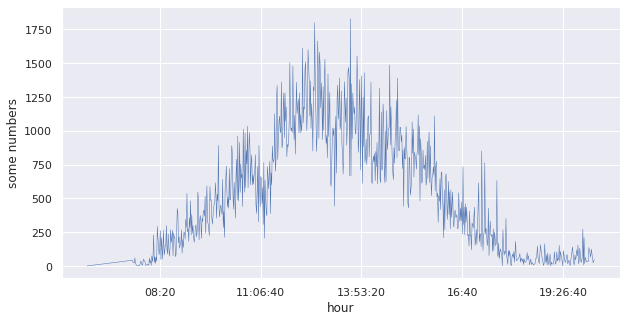

In [21]:
mx_time_gb['InvoiceNo'].plot(linewidth=0.5)
plt.ylabel('numbers of ')

In [69]:
mx_time_gb2 = mx_time.groupby('hour', as_index=False).count()
mx_time_gb2

,hour,InvoiceNo
0,06:20:00,1
1,07:35:00,43
2,07:36:00,27
3,07:37:00,26
4,07:38:00,23
...,...,...
733,20:09:00,137
734,20:12:00,66
735,20:13:00,125
736,20:16:00,24


In [70]:
list_of_single_column = mx_time_gb2['InvoiceNo'].tolist()

In [82]:
timestampStr = mx_time_gb2['hour'].strftime(" %H:%M")

AttributeError: ignored

In [78]:
list_of_single_column2 = hour['hour'].tolist()


In [79]:
solo_hora_str = hour['hour'].strftime('%H:%M:%S')

AttributeError: ignored

In [63]:
type(list_of_single_column2)

list

TypeError: ignored

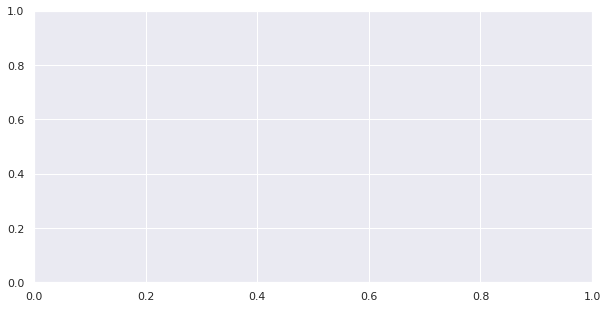

In [73]:
plt.bar(list_of_single_column, list_of_single_column2 )